In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 항공권 Dataset

In [3]:
# 01. 데이터 수집 및 로딩
df = pd.read_csv('../data/synthetic_flight_passenger_data.csv')
df.head()

,Passenger_ID,Flight_ID,Airline,Departure_Airport,Arrival_Airport,Departure_Time,Flight_Duration_Minutes,Flight_Status,Distance_Miles,Price_USD,...,Bags_Checked,Frequent_Flyer_Status,Check_in_Method,Flight_Satisfaction_Score,Delay_Minutes,Booking_Days_In_Advance,No_Show,Weather_Impact,Seat_Selected,Booking_Lead_Time
0,P1,F68,Southwest,JFK,ATL,2024-03-27 06:22:06,161,On-time,803,148.42,...,2,Platinum,Online,8.801356,0.0,91,1,1,Window,102
1,P2,F1687,Southwest,JFK,DFW,2024-12-28 09:18:06,130,On-time,1605,228.57,...,1,Gold,Airport Kiosk,9.094380,2.0,45,0,0,Middle,51
2,P3,F1745,United,ORD,ORD,2024-05-23 23:28:20,169,On-time,908,232.45,...,0,Silver,Airport Kiosk,8.015235,0.0,63,0,0,Middle,92
3,P4,F1514,Delta,SEA,ORD,2023-10-31 08:09:27,227,On-time,63,526.43,...,0,Platinum,Online,7.544133,9.0,57,0,1,Window,14
4,P5,F1753,Southwest,LAX,JFK,2025-01-17 22:21:13,150,On-time,628,324.14,...,2,Silver,Desk,7.133140,3.0,58,0,0,Middle,106


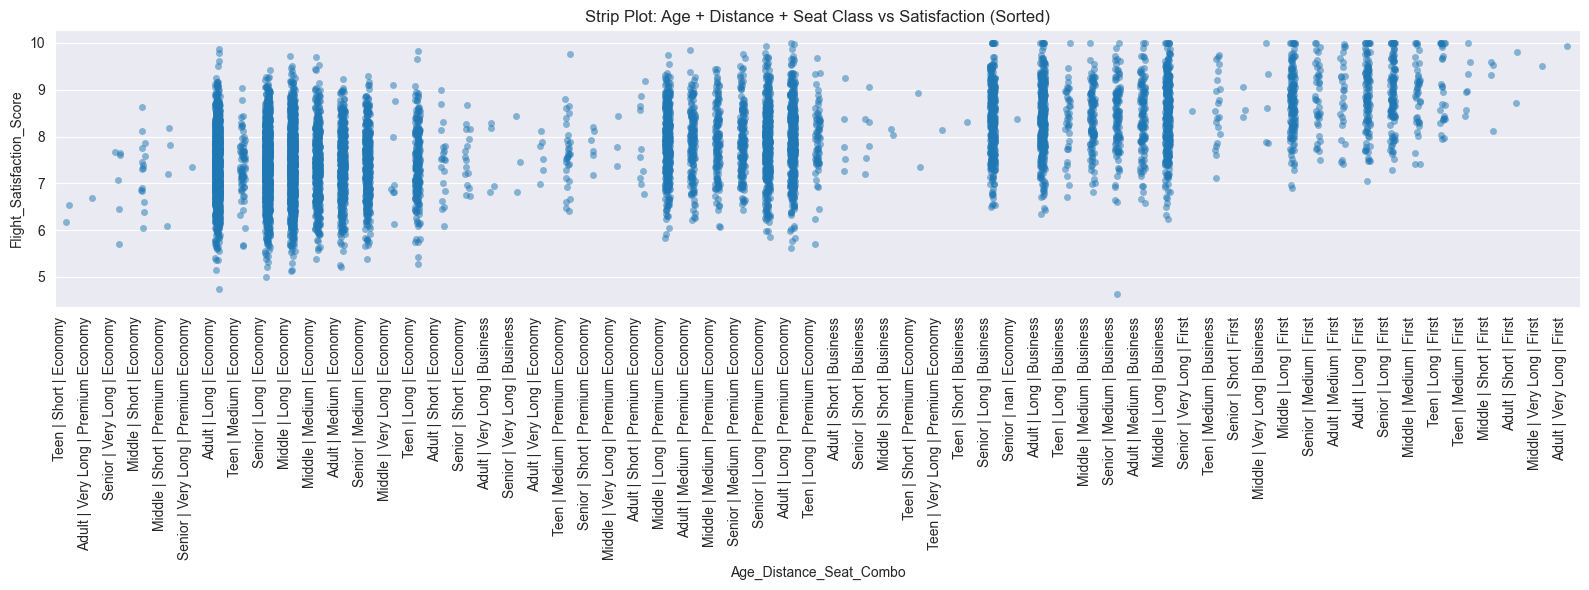

C:\Users\play data\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 83.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\play data\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\play data\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 83.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\play data\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 84.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\play data\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWar

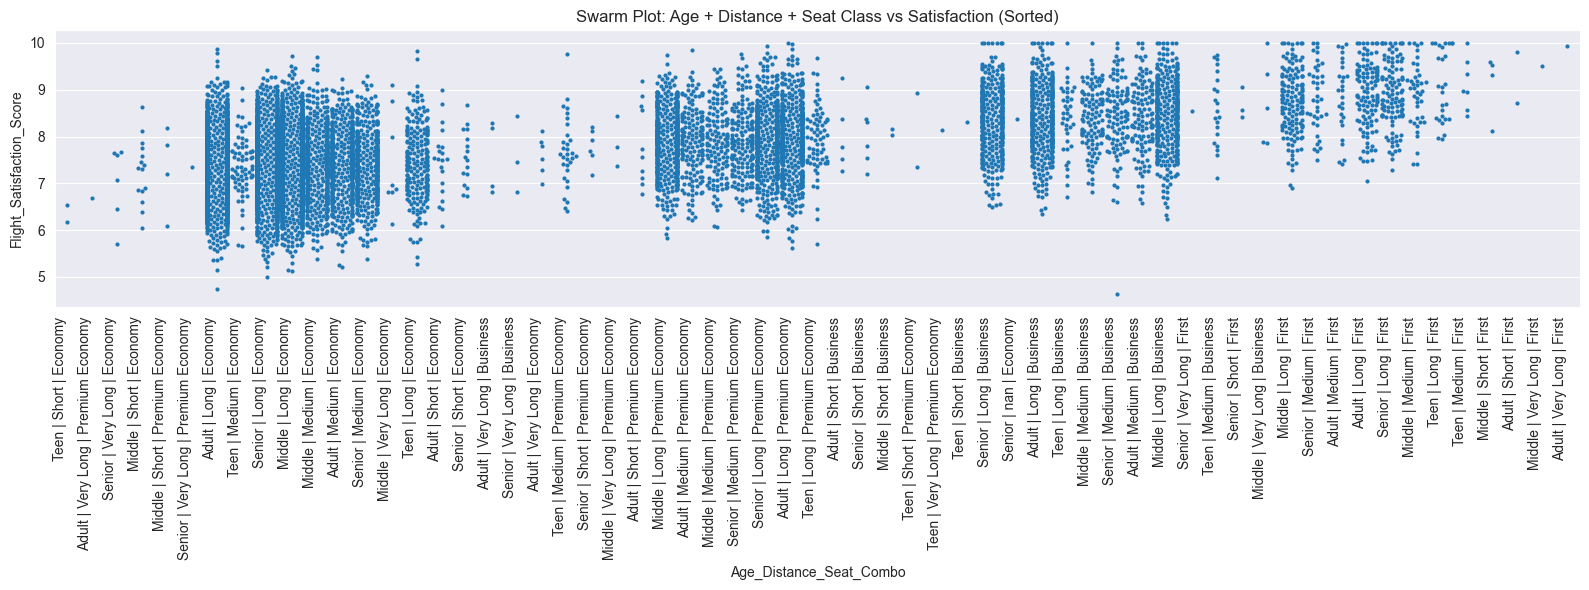

C:\Users\play data\AppData\Local\Temp\ipykernel_4600\1292201430.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x='Age_Distance_Seat_Combo', y='Flight_Satisfaction_Score',


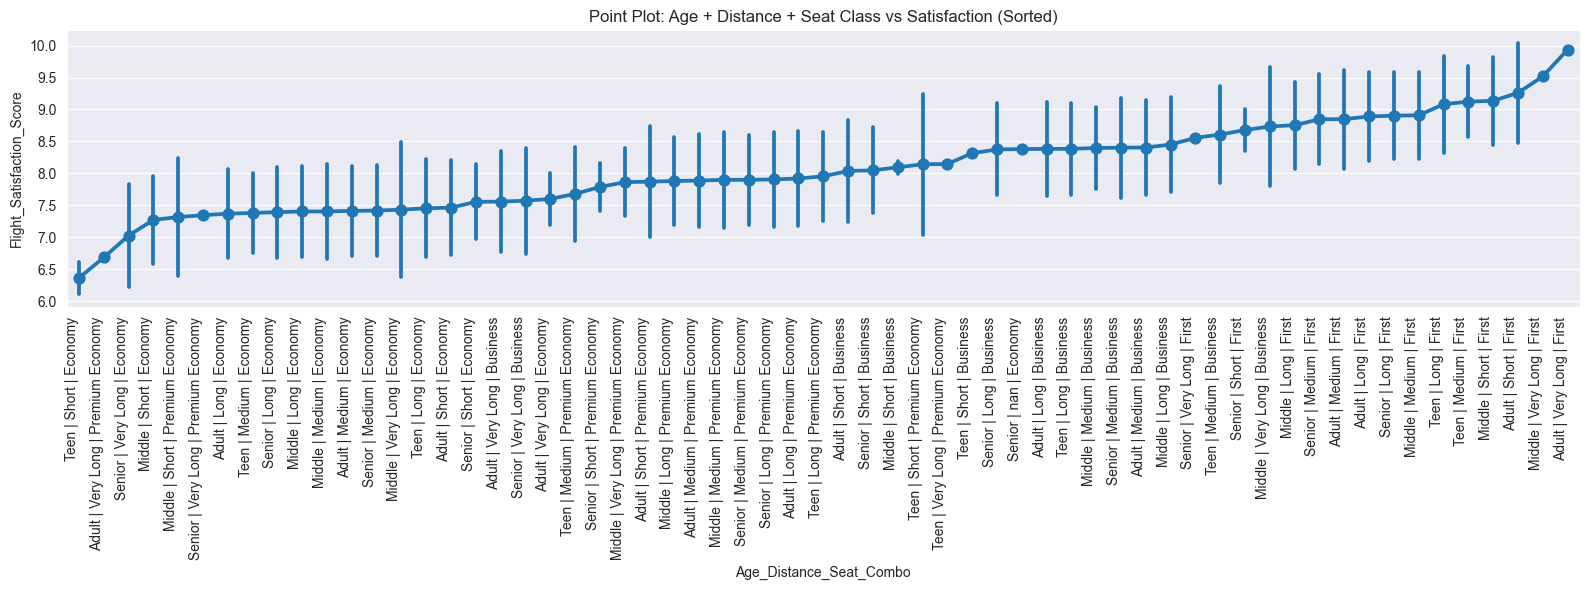

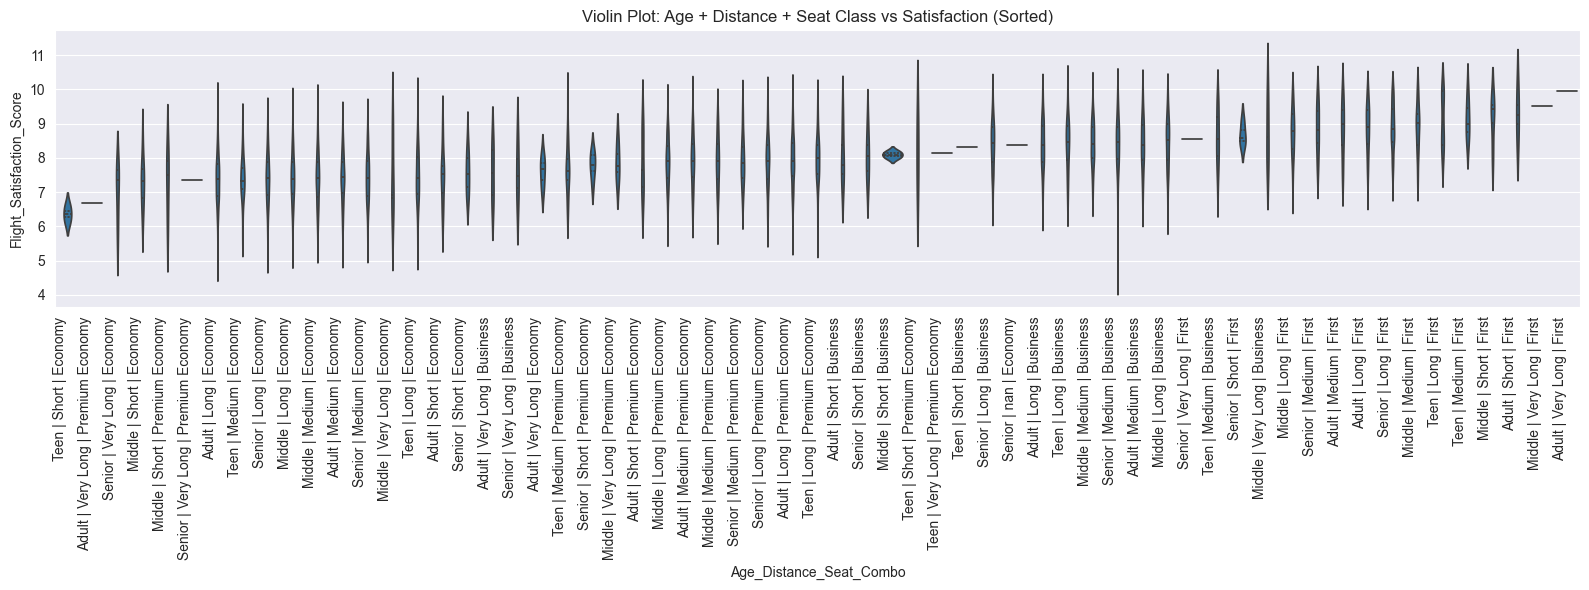

C:\Users\play data\AppData\Local\Temp\ipykernel_4600\1292201430.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Age_Distance_Seat_Combo', y='Flight_Satisfaction_Score',


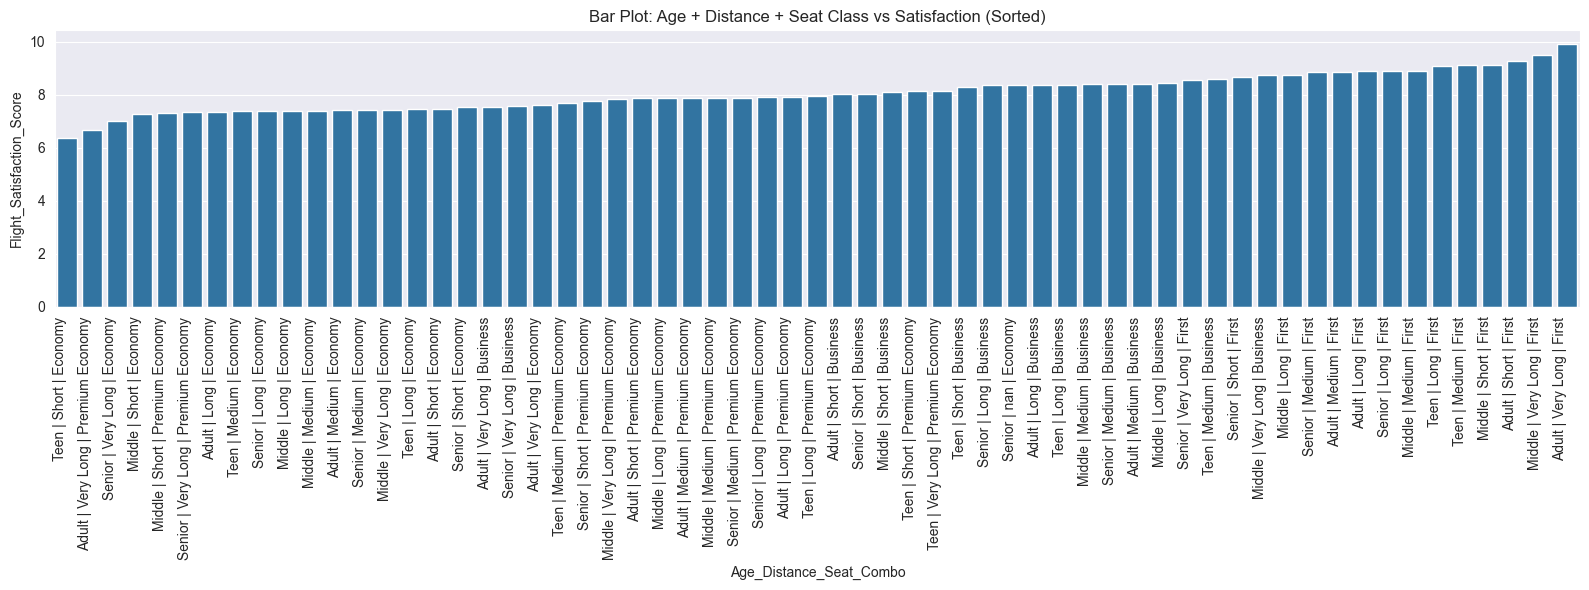

C:\Users\play data\AppData\Local\Temp\ipykernel_4600\1292201430.py:64: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_age_distance_seat = df.pivot_table(


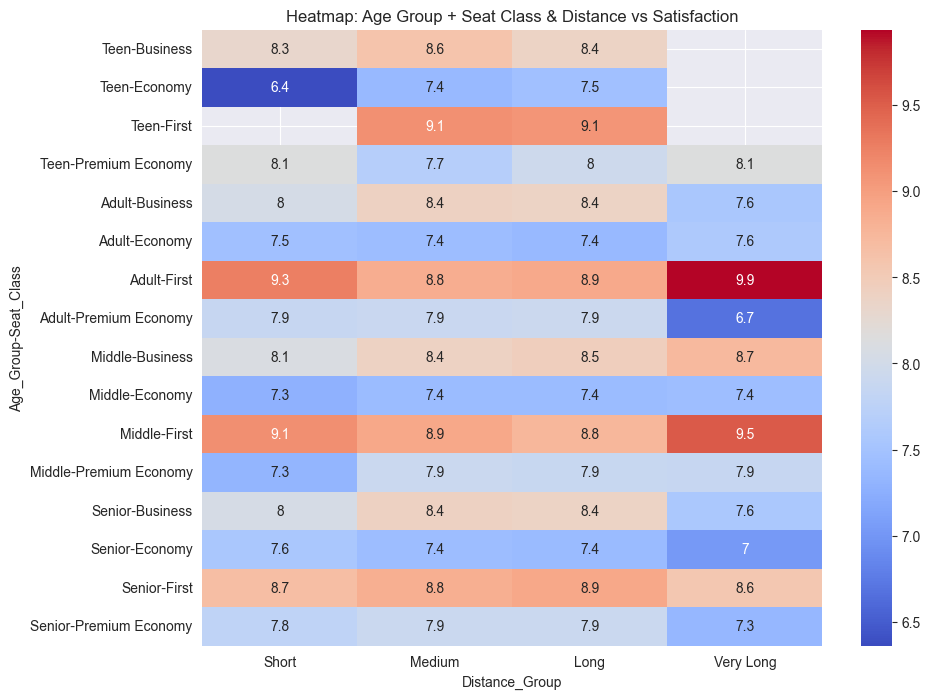

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 1️⃣ Feature Engineering: 나이 그룹 + 거리 그룹 + 좌석 등급 결합 컬럼 생성
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 100], labels=['Teen', 'Adult', 'Middle', 'Senior'])
df['Distance_Group'] = pd.cut(df['Distance_Miles'], bins=[0, 500, 1000, 2000, 3000], labels=['Short', 'Medium', 'Long', 'Very Long'])
df['Age_Distance_Seat_Combo'] = (
    df['Age_Group'].astype(str) + ' | ' +
    df['Distance_Group'].astype(str) + ' | ' +
    df['Seat_Class']
)

# ✅ 정렬 기준 생성 (평균 만족도 기준 오름차순)
mean_scores = df.groupby('Age_Distance_Seat_Combo')['Flight_Satisfaction_Score'].mean().sort_values()
sorted_categories = mean_scores.index.tolist()

# ✅ 2️⃣ Strip Plot (정렬 적용)
plt.figure(figsize=(16, 6))
sns.stripplot(data=df, x='Age_Distance_Seat_Combo', y='Flight_Satisfaction_Score',
               order=sorted_categories, jitter=True, alpha=0.5)
plt.xticks(rotation=90, ha='right')
plt.title('Strip Plot: Age + Distance + Seat Class vs Satisfaction (Sorted)')
plt.tight_layout()
plt.show()

# ✅ 3️⃣ Swarm Plot (정렬 적용)
plt.figure(figsize=(16, 6))
sns.swarmplot(data=df, x='Age_Distance_Seat_Combo', y='Flight_Satisfaction_Score',
                order=sorted_categories, size=3)
plt.xticks(rotation=90, ha='right')
plt.title('Swarm Plot: Age + Distance + Seat Class vs Satisfaction (Sorted)')
plt.tight_layout()
plt.show()

# ✅ 4️⃣ Point Plot (정렬 적용)
plt.figure(figsize=(16, 6))
sns.pointplot(data=df, x='Age_Distance_Seat_Combo', y='Flight_Satisfaction_Score',
                order=sorted_categories, ci='sd')
plt.xticks(rotation=90, ha='right')
plt.title('Point Plot: Age + Distance + Seat Class vs Satisfaction (Sorted)')
plt.tight_layout()
plt.show()

# ✅ 5️⃣ Violin Plot (정렬 적용)
plt.figure(figsize=(16, 6))
sns.violinplot(data=df, x='Age_Distance_Seat_Combo', y='Flight_Satisfaction_Score',
                 order=sorted_categories, inner='quartile')
plt.xticks(rotation=90, ha='right')
plt.title('Violin Plot: Age + Distance + Seat Class vs Satisfaction (Sorted)')
plt.tight_layout()
plt.show()

# ✅ 6️⃣ Bar Plot (평균 만족도, 정렬 적용)
plt.figure(figsize=(16, 6))
sns.barplot(data=df, x='Age_Distance_Seat_Combo', y='Flight_Satisfaction_Score',
               order=sorted_categories, ci=None)
plt.xticks(rotation=90, ha='right')
plt.title('Bar Plot: Age + Distance + Seat Class vs Satisfaction (Sorted)')
plt.tight_layout()
plt.show()

# ✅ 7️⃣ Heatmap (상관관계 분석, 별도 정렬 필요 없음)
pivot_age_distance_seat = df.pivot_table(
    values='Flight_Satisfaction_Score',
    index=['Age_Group', 'Seat_Class'],
    columns='Distance_Group'
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_age_distance_seat, annot=True, cmap="coolwarm")
plt.title("Heatmap: Age Group + Seat Class & Distance vs Satisfaction")
plt.show()
